In [21]:
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.inspection import DecisionBoundaryDisplay
import matplotlib.pyplot as plt


df=sns.load_dataset("iris")

y_col="species"
X=df.drop(columns=[y_col])
y=df[y_col]

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=0)

scaler=StandardScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

pca=PCA(n_components=2)
pca.fit(X_train_scaled)
X_train_pca=pca.transform(X_train_scaled)
X_test_pca=pca.transform(X_test_scaled)

model=SVC(kernel="poly")
model.fit(X_train_pca,y_train)

pred=model.predict(X_test_pca)

accuracy_score(y_test,pred)

0.8888888888888888

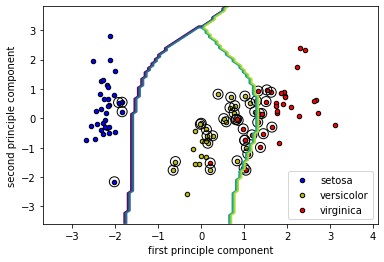

In [22]:
DecisionBoundaryDisplay.from_estimator(model,
                                       X_train_pca,
                                       plot_method="contour",
                                       xlabel="first principle component",
                                       ylabel="second principle component")

for class_,color in zip(model.classes_,"byr"):
    idx=np.where(y_train==class_)
    plt.scatter(x=X_train_pca[idx,0],
                y=X_train_pca[idx,1],
                c=color,
                label=class_,
                edgecolor="black",
                s=20) 
    
plt.legend()

plt.scatter(model.support_vectors_[:,0],
            model.support_vectors_[:,1],
            s=100,
            facecolor="none",
            edgecolor="black",
            linewidth=1)